<a href="https://colab.research.google.com/github/jelade/Jaleel/blob/master/Deep_learning_Abduljaleel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Deep Learning Project 1`**
### **`Student Name: Adejumo Abduljaleel Amobi`**

In [ ]:
import tensorflow as tf  #importation of data and needed library
from tensorflow import keras
boston_housing = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
import pandas as pd
from keras import backend as K
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

In [ ]:
scaler = StandardScaler()
train_data_scale = scaler.fit_transform(train_data)
test_data_scale = scaler.fit_transform(test_data)

In [ ]:
from keras import Sequential
from keras.layers import Dense

#build our model
model = Sequential()

model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='RMSprop',metrics=['mae'])

In [ ]:
#Fit model
hist = model.fit(train_data_scale,train_labels,batch_size=102, epochs=1000, validation_split=0.2)

Epoch 1/1000
4/4 [==============================] - 1s 52ms/step - loss: 553.3572 - mae: 21.6597 - val_loss: 567.7974 - val_mae: 22.0025
Epoch 2/1000
4/4 [==============================] - 0s 8ms/step - loss: 479.3289 - mae: 19.8684 - val_loss: 467.6548 - val_mae: 19.6201
Epoch 3/1000
4/4 [==============================] - 0s 8ms/step - loss: 379.4718 - mae: 17.2473 - val_loss: 342.6388 - val_mae: 16.3162
Epoch 4/1000
4/4 [==============================] - 0s 8ms/step - loss: 263.7840 - mae: 13.9774 - val_loss: 217.3075 - val_mae: 12.4271
Epoch 5/1000
4/4 [==============================] - 0s 8ms/step - loss: 161.6151 - mae: 10.4833 - val_loss: 145.5354 - val_mae: 9.6877
Epoch 6/1000
4/4 [==============================] - 0s 8ms/step - loss: 105.0152 - mae: 8.1031 - val_loss: 88.8577 - val_mae: 7.2491
Epoch 7/1000
4/4 [==============================] - 0s 8ms/step - loss: 68.4685 - mae: 6.4019 - val_loss: 60.6268 - val_mae: 5.9014
Epoch 8/1000
4/4 [==============================] - 0s 

## **Model Evaluation**

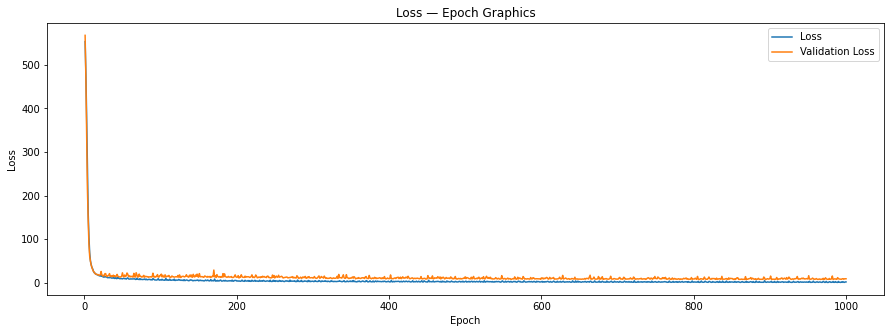

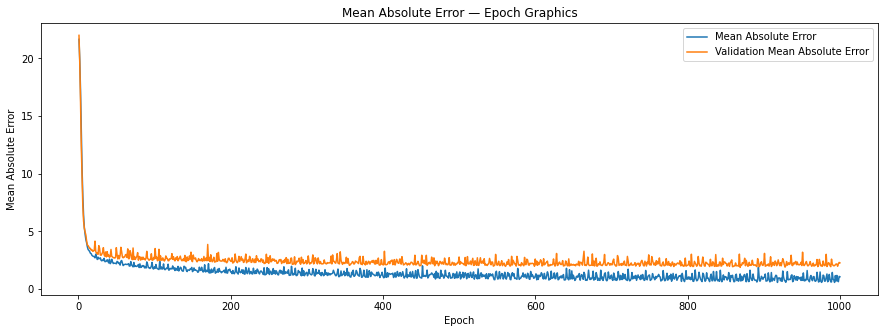

In [ ]:
import matplotlib.pyplot as plt
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Mean Absolute Error — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1), hist.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [ ]:
evalu = model.evaluate(test_data_scale,test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 13.6684 - mae: 2.6664


In [ ]:
test_pred = model.predict(test_data_scale)


In [ ]:
test_pred[0:6]

array([[ 7.782315],
       [20.302265],
       [22.513107],
       [25.718403],
       [24.594393],
       [25.940765]], dtype=float32)

In [ ]:
test_labels[0:6]

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5])

In [ ]:
r2 = r2_score(test_labels, test_pred)
print(r2)

0.8358026095261766
